# **Python: Projeto Final** | Quem gasta mais?

# **Tópicos**

<ol type="1">
  <li>Descrição;</li>
  <li>Importação de bibliotecas;</li>
  <li>Explorando dados;</li>
  <li>Tratamento de dados e limpeza;</li>
  <li>Análise e insights.</li>
</ol>


## 1. Descrição

Houve a necessidade de identificar o estado civil das pessoas que mais utilizam crédito em uma empresa de cartão de crédito e gastam, para termos uma ideia de quem são os principais clientes.

A partir disso, serão realizados alguns tratamentos e análises em nosso DataFrame para traçar o perfil comum desses clientes e determinar como devemos atraí-los.

## 2. Importanto bibliotecas

Vamos importar as bibliotecas a serem utilizadas no projeto

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sns.set_style("whitegrid")

## 3. Explorando os dados

### 3.1 Estrutura

Utilizaremos o Pandas para criar o DataFrame e poder verificar a base de dados mais detalhadamente


In [3]:
df = pd.read_csv('./Python_M10_support material.csv', na_values='na')

In [4]:
df.head(5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Usando o método head e atribuindo o valor desejado, podemos ver o DataFrame. Logo, vamos usar o atributo shape para verificar quantas linhas e colunas o nosso DataFrame possui. Abaixo, uma visão detalhada com o nome das colunas e suas descrições.

In [5]:
df.shape

(10127, 16)

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

### 3.2 Schema

Vamos verificar os tipos de cada coluna

In [6]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Verificando mais detalhadamente o tipo 'Object' no DataFrame.

In [7]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


É notável que salario_anual, limite_credito e valor_transacoes_12m constam como 'Object'. Agora, vamos verificar os atributos numéricos.

In [8]:
df.drop('id', axis = 1 ).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


O 'id' não é necessário como um tipo numérico, por isso foi removido dessa visualização. Aqui, podemos ter uma noção de quais colunas podemos trabalhar e quais estão faltando nessa seleção

### 3.2 Dados Faltantes

Vamos verificar os dados faltantes que podem ser:
 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [9]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Podemos ver que só as colunas escolaridades, estado_civil e salario_anual contém valores vazios ('na').

## 4. Tratamento de dados e limpeza

### 4.1 Correção de schema

Como vimos que algumas colunas não estão no formato correto para realizarmos a análise como limite_credito e valor_transacoes_12m , vamos corrigir isso para uma análise mais precisa.

In [10]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [11]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função lambda e aplicar no nosso dataframe.

In [12]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

Vamos verificar o tipo dessas colunas novamente e o dataframe

In [13]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

In [14]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [15]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [16]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### 4.2 Removendo os dados faltantes

Vamos verificar a quantidade de linhas e colunas do DataFrame.

In [17]:
df.shape

(10127, 16)

Sabendo da existência de dados faltantes, vamos removê-los do DataFrame e verificar a quantidade de linhas que sobraram.

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(7081, 16)

# 5. Análise e insights.

Nesta etapa final, que é a mais importante, vamos realizar nossa análise para obter insights sobre o estado civil de nossos clientes e identificar qual estado civil apresenta os maiores gastos.

In [20]:
df.head(5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24


- Criando DataFrame de cada estado civil

In [21]:
df_casado = df[df['estado_civil'] == 'casado']
df_divorciado = df[df['estado_civil'] == 'divorciado']
df_solteiro = df[df['estado_civil'] == 'solteiro']

### 5.1 Visualização  categóricas

In [22]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


Nesta etapa, vou analisar os tipos categóricos como cartão de crédito mais utilizado por cada estado civil e o salário anual. Vamos trabalhar no dataframe para preparar os dados para a análise.

In [23]:
df[['estado_civil']].value_counts()

estado_civil
casado          3564
solteiro        2948
divorciado       569
Name: count, dtype: int64

In [24]:
df[['tipo_cartao']].value_counts()

tipo_cartao
blue           6598
silver          391
gold             81
platinum         11
Name: count, dtype: int64

In [25]:
df[['salario_anual']].value_counts()

salario_anual 
menos que $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: count, dtype: int64

 Agora sabemos a quantidade de cada dados que vamos trabalhar por colunas. Sabemos que no nosso DataFrame temos mais Casados, também que o tipo de cartão mais utilizado é Blue e quem a maior media salárial é menos que 40K

- Quantidade de cartão por tipo e estado civil

C:\Users\jhon\AppData\Local\Temp\ipykernel_11792\3149982253.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


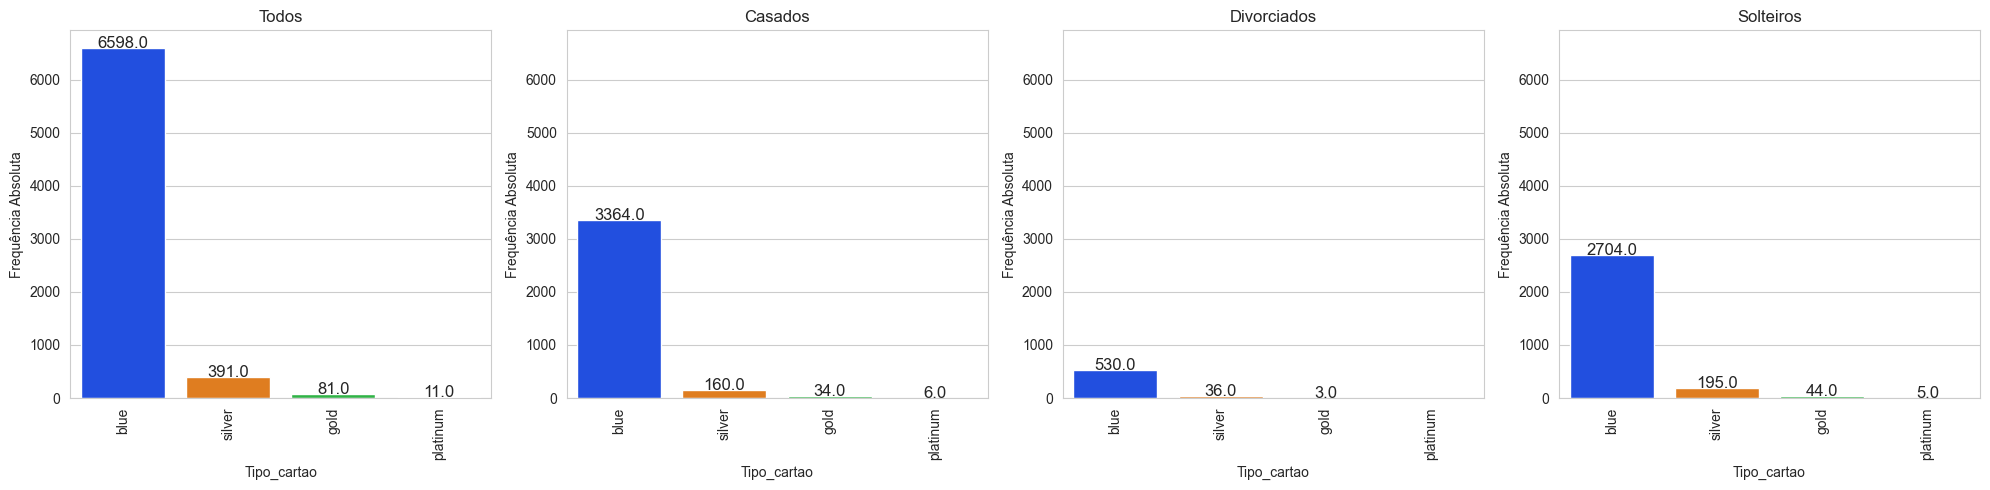

In [26]:
coluna = 'tipo_cartao'
titulos = ['Todos', 'Casados', 'Divorciados', 'Solteiros']


eixo = 0
max_y = 0
min_y = 0
max_t = df[coluna].value_counts().max() * 1.1

figura, eixos = plt.subplots(1,4, figsize=(20, 5), sharex=True)

for dataframe, titulo in zip([df, df_casado, df_divorciado, df_solteiro], titulos):

  df_to_plot = dataframe[coluna].value_counts().to_frame(name='frequencia_absoluta')
  df_to_plot.reset_index(inplace=True)
  df_to_plot.rename(columns={'index': coluna}, inplace=True)


  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo], palette= 'bright')

  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  for i in f.patches:
    f.annotate(i.get_height(),(i.get_x()+ i.get_width() / 2, i.get_height()),
               ha='center', va='baseline', fontsize=12)



  min_y_f, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  min_y = min_y_f if min_y_f > min_y else min_y
  f.set(ylim=(min_y, max_y))


  eixo += 1

figura.tight_layout()
figura.show()

Podemos ver nos gráficos de barras que a diferença entre casados e solteiros é mínima. Os solteiros possuem mais cartões Silver e Gold em comparação aos casados. Também podemos notar uma diferença significativa no cartão Blue, com os casados possuindo uma maior quantidade. O cartão Platinum não mostra grandes diferenças. Os divorciados, como são poucos em nosso DataFrame, possuem poucos cartões ou nenhum.

- Média salarial por estado civil

C:\Users\jhon\AppData\Local\Temp\ipykernel_11792\2481084862.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


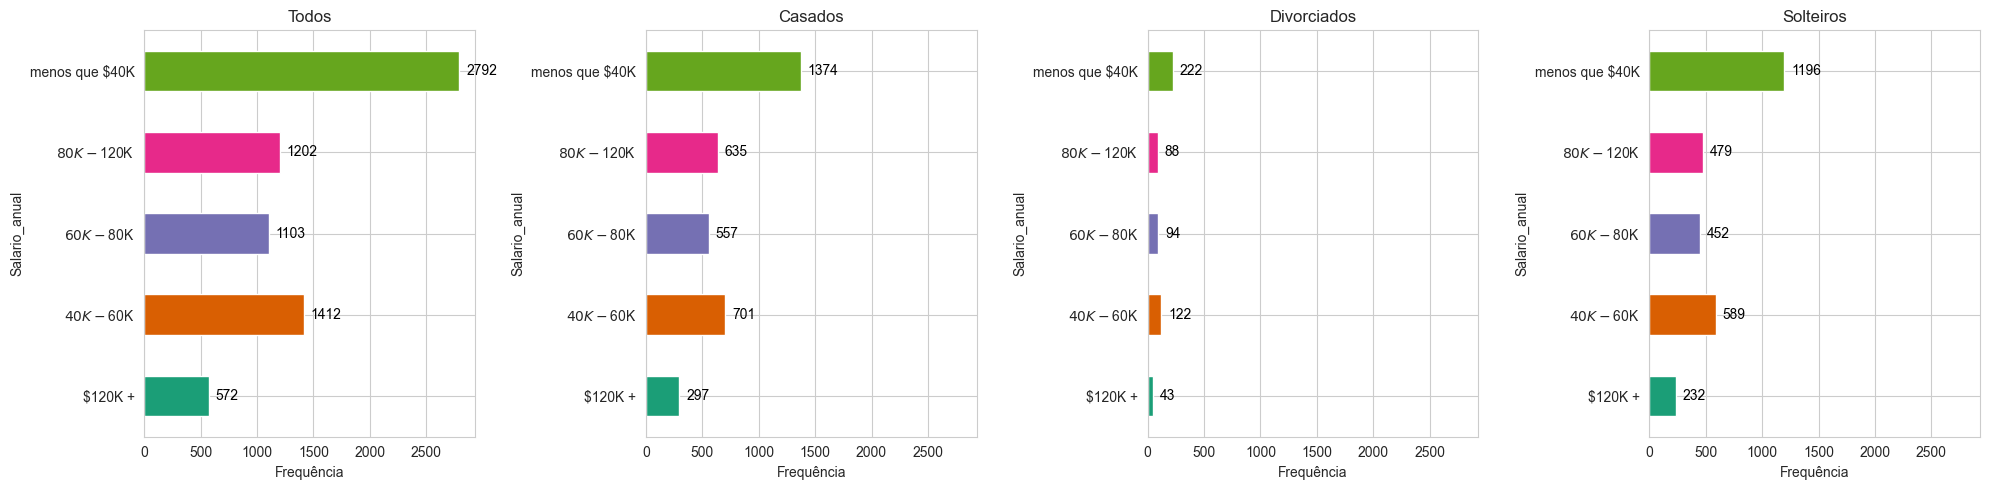

In [27]:
coluna = 'salario_anual'
titulos = ['Todos', 'Casados', 'Divorciados', 'Solteiros']
dataframes = [df, df_casado, df_divorciado, df_solteiro]

figura, eixos = plt.subplots(1, 4, figsize=(20, 5), sharex=True)

for eixo, (dataframe, titulo) in enumerate(zip(dataframes, titulos)):

    grupo = dataframe.groupby(coluna).size()
    grupo.plot(kind='barh', color=sns.color_palette('Dark2'), ax=eixos[eixo])


    eixos[eixo].set_title(titulo)
    eixos[eixo].set_xlabel('Frequência')
    eixos[eixo].set_ylabel(coluna.capitalize())


    for i in eixos[eixo].patches:
        eixos[eixo].annotate(f'{i.get_width():.0f}',
                             (i.get_width(), i.get_y() + i.get_height() / 2),
                             ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')


figura.tight_layout()
figura.show()

Vemos aqui que a diferença na média salarial entre casados e os demais é pequena, levando em conta que nosso DataFrame possui mais casados. Em comparação, os casados são os que possuem uma média salarial melhor, seguidos pelos solteiros.


- Essas duas análises categóricas não me trazem uma análise satisfatória em relação a avaliar quem gasta mais. Vamos incluir mais visualizações para entender melhor.

### 5.2 Visualização numérica

Vamos verificar se as colunas numéricas vão nos ajudar.

In [28]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5).sort_values(by='limite_credito', ascending=True	)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
2,51,3,36,4,0,1,3418.56,1887.72,20
5,44,2,36,3,2,1,4010.69,1088.07,24
4,40,3,21,5,0,1,4716.22,816.08,28
1,49,5,44,6,2,1,8256.96,1291.45,33
0,45,3,39,5,3,1,12691.51,1144.90,42


- Limite de crédito

C:\Users\jhon\AppData\Local\Temp\ipykernel_11792\223301487.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


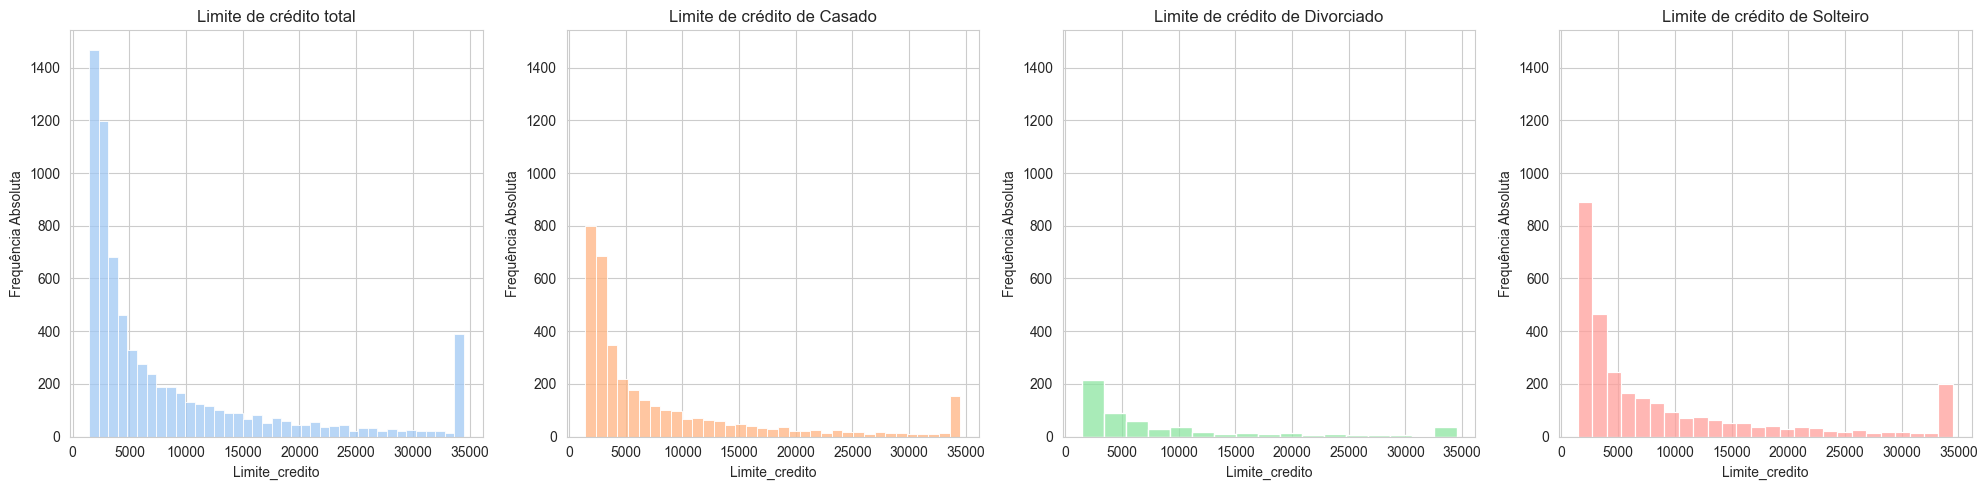

In [29]:
coluna = 'limite_credito'
titulos = ['Limite de crédito total', 'Limite de crédito de Casado', 'Limite de crédito de Divorciado', 'Limite de crédito de Solteiro']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,4, figsize=(20, 5), sharex=True)
cores = sns.color_palette('pastel', 4)

dataframes = [df, df_casado, df_divorciado, df_solteiro]

for eixo, (dataframe, titulo) in enumerate(zip(dataframes, titulos)):

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo], color=cores[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')


  _, max_y_f = f.get_ylim()
  max_y = max(max_y, max_y_f)
  eixos[eixo].set_ylim(0, max_y)

  eixo += 1


figura.tight_layout()
figura.show()


Os gráficos mostram que os solteiros têm uma quantidade de limite de crédito maior, enquanto os picos de maior frequência para os casados estão abaixo de 10 mil.

- Quantidade de Transações no Último Ano

C:\Users\jhon\AppData\Local\Temp\ipykernel_11792\3363134775.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


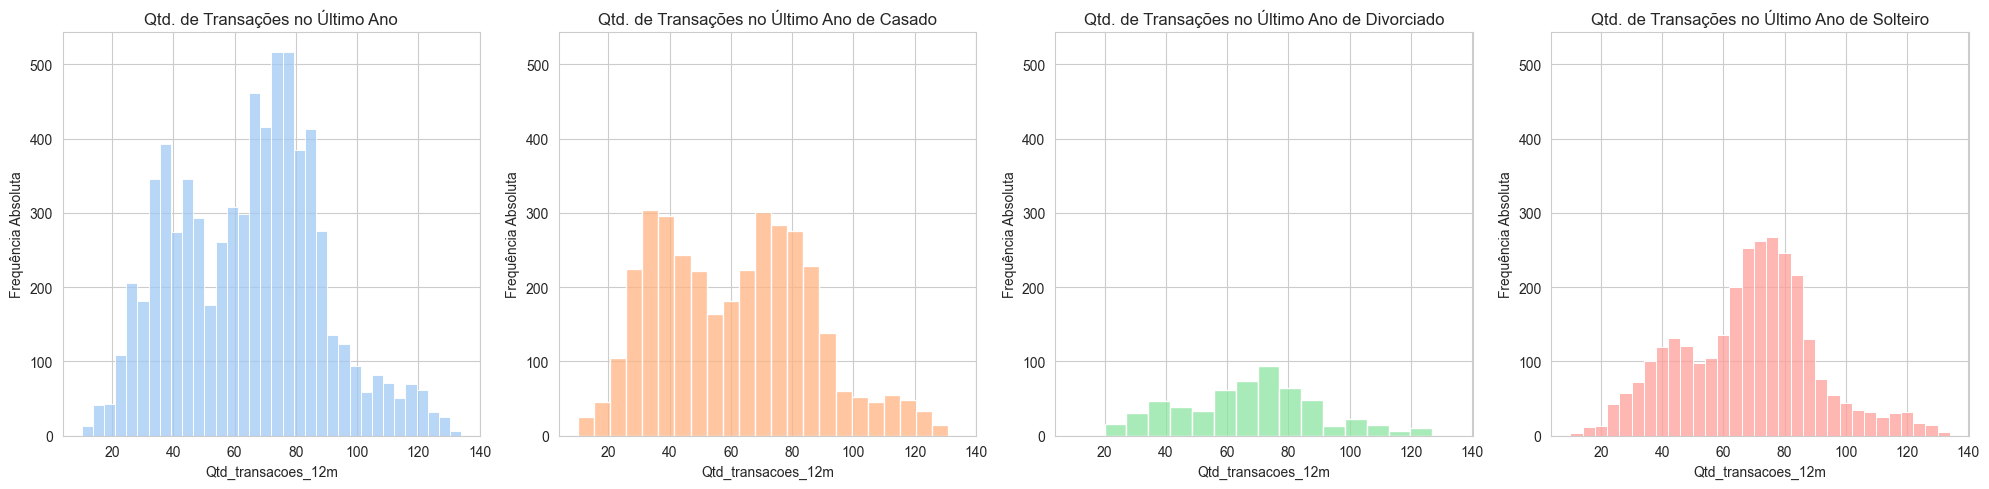

In [30]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Casado', 'Qtd. de Transações no Último Ano de Divorciado', 'Qtd. de Transações no Último Ano de Solteiro']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,4, figsize=(20, 5), sharex=True)
cores = sns.color_palette('pastel', 4)

dataframes = [df, df_casado, df_divorciado, df_solteiro]

for eixo, (dataframe, titulo) in enumerate(zip(dataframes, titulos)):

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo], color=cores[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')


  _, max_y_f = f.get_ylim()
  max_y = max(max_y, max_y_f)
  eixos[eixo].set_ylim(0, max_y)

  eixo += 1


figura.tight_layout()
figura.show()



No último ano, os casados tiveram uma quantidade maior de transações, apresentando uma boa frequência.

- Valor de Transações no Último Ano

C:\Users\jhon\AppData\Local\Temp\ipykernel_11792\3335848850.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


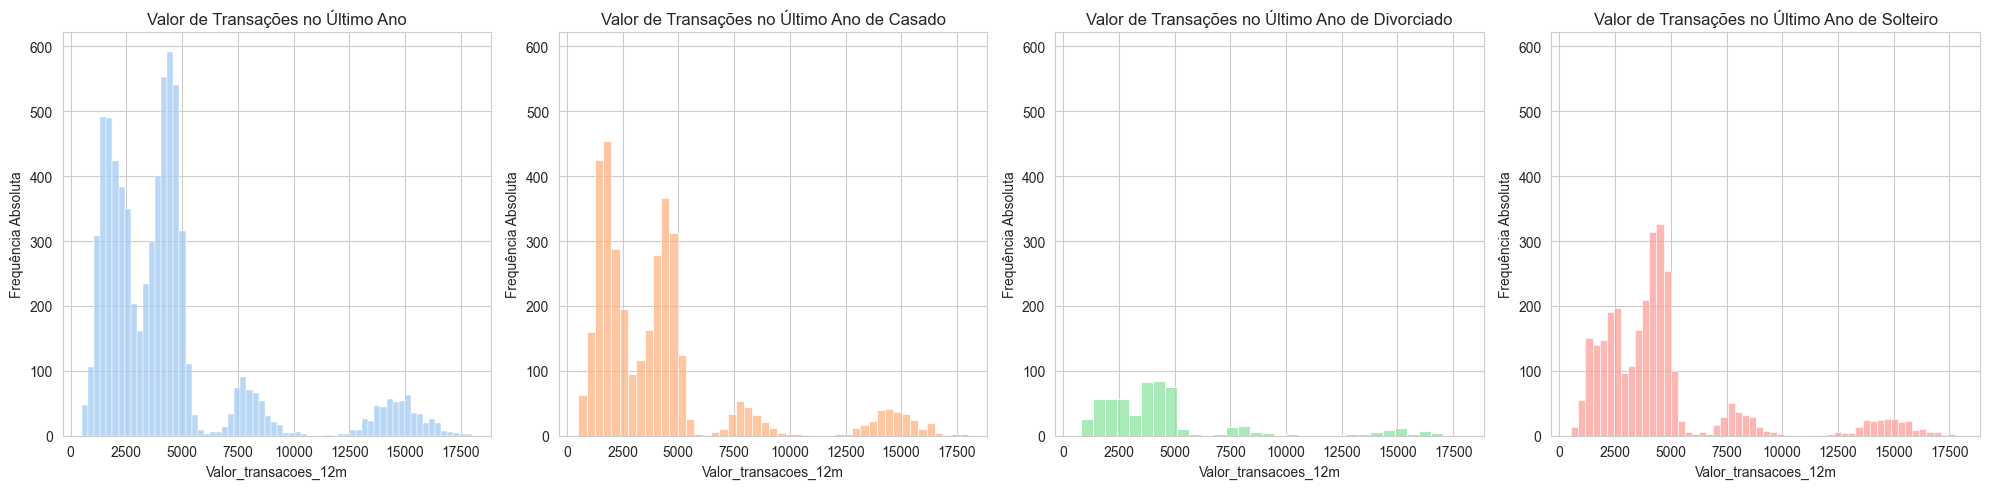

In [31]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor de Transações no Último Ano', 'Valor de Transações no Último Ano de Casado', 'Valor de Transações no Último Ano de Divorciado', 'Valor de Transações no Último Ano de Solteiro']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,4, figsize=(20, 5), sharex=True)
cores = sns.color_palette('pastel', 4)

dataframes = [df, df_casado, df_divorciado, df_solteiro]

for eixo, (dataframe, titulo) in enumerate(zip(dataframes, titulos)):

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo], color=cores[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')



  _, max_y_f = f.get_ylim()
  max_y = max(max_y, max_y_f)
  eixos[eixo].set_ylim(0, max_y)

  eixo += 1


figura.tight_layout()
figura.show()


Os valores de transação não são tão altos.

- Relação

C:\Users\jhon\AppData\Local\Temp\ipykernel_11792\2481934357.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=50)
C:\Users\jhon\AppData\Local\Temp\ipykernel_11792\2481934357.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=50)
C:\Users\jhon\AppData\Local\Temp\ipykernel_11792\2481934357.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=50)
C:\Users\jhon\AppData\Local\Temp\ipykernel_11792\2481934357.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=50)


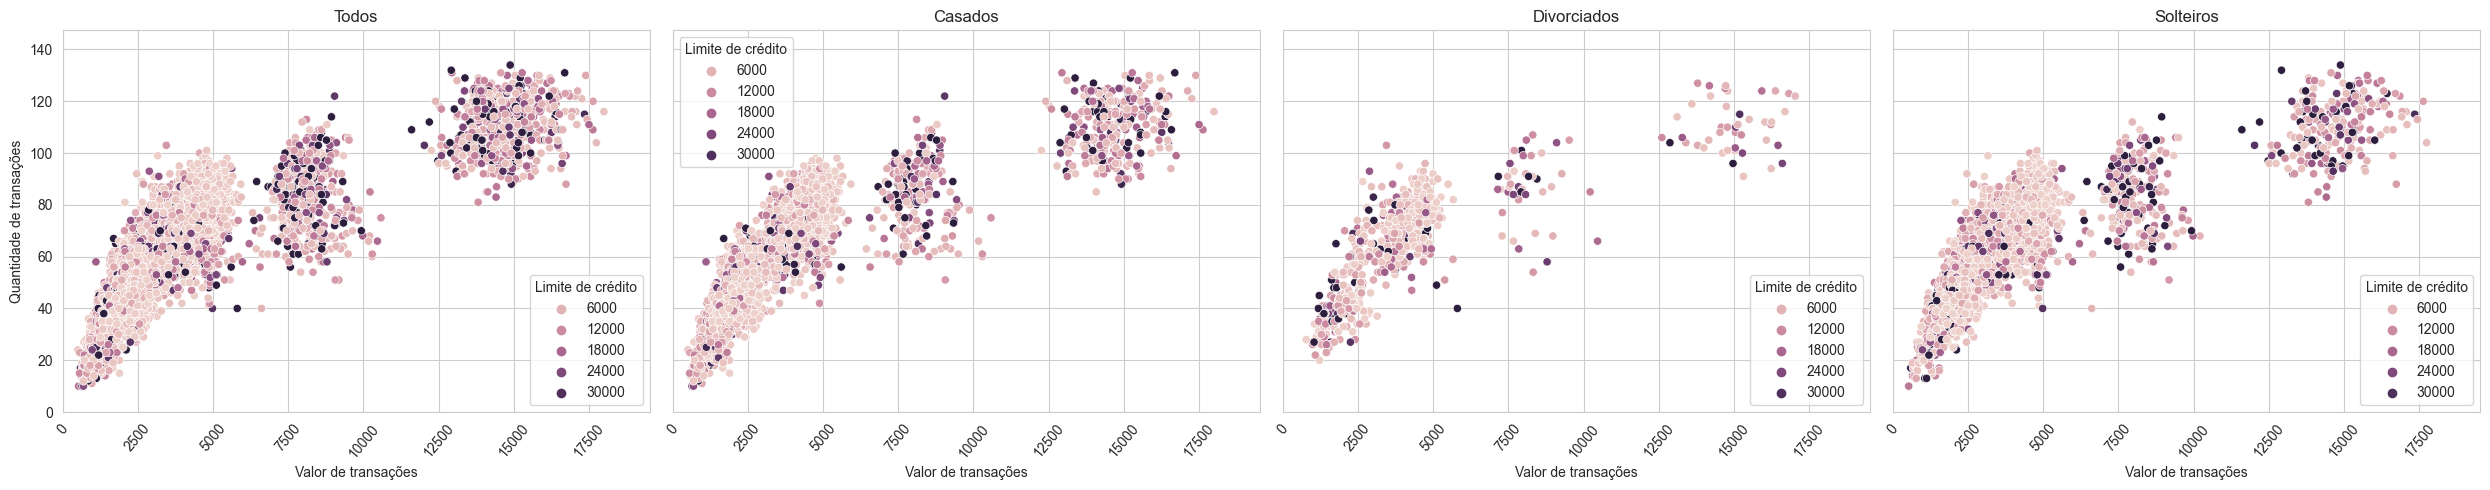

In [32]:
coluna_y = 'qtd_transacoes_12m'
coluna_x = 'valor_transacoes_12m'
titulos = ['Todos', 'Casados', 'Divorciados', 'Solteiros']
dataframes = [df, df_casado, df_divorciado, df_solteiro]


figura, eixos = plt.subplots(1, 4, figsize=(25, 5), sharex=True, sharey=True)

for eixo, (dataframe, titulo) in enumerate(zip(dataframes, titulos)):
    f = sns.scatterplot(x=coluna_x, y=coluna_y, data=dataframe, ax=eixos[eixo], hue='limite_credito')
    f.set(title=titulo, ylabel='Quantidade de transações', xlabel='Valor de transações')
    f.legend(title = 'Limite de crédito')
    eixos[eixo].set_xlim(0, dataframe[coluna_x].max() * 1.1)
    eixos[eixo].set_ylim(0, dataframe[coluna_y].max() * 1.1)
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=50)

figura.tight_layout()
plt.show()

### 5.3 Insight

Chegando à conclusão, podemos dizer que obtivemos alguns insights importantes das nossas análises e gráficos:

- Podemos notar que nosso DataFrame tem mais Casados e Solteiros.
- Entre as categorias de estado civil, os Solteiros são os que possuem mais cartões dos tipos silver e gold. Entre os Casados, é o Blue.
- A média salarial não apresenta muita diferença, especialmente entre Casados e Solteiros.
- Algo importante foi notado: os Solteiros têm limites de crédito maiores que os Casados.
- No entanto, os Casados tiveram uma frequência de transações no último ano maior, com valores baixos.
- No gráfico de relação, é mostrado que, com um limite de crédito baixo, os Casados têm, em comparação aos Solteiros, uma maior quantidade de transações de valor alto.

Com esses dados, podemos criar um plano de ação para atrair mais clientes casados com maiores créditos e melhores possibilidades de transações.